In [4]:
%run 'load_files.ipynb'

In [5]:
# Load all data pertaining to this answer
disposition_df = load_disposition()
diagnosis_df = load_diagnosis()

DataFrame disposition_df loaded
DataFrame diagnosis_df loaded


In [6]:
disposition_df.head()

,disposition_exp,disposition
0,"Treated and released, or examined and released...",1
1,Treated and transferred to another hospital,2
2,Treated and admitted for hospitalization (with...,4
3,Held for observation (includes admitted for ob...,5
4,Left without being seen/Left against medical a...,6


In [8]:
diagnosis_df.head()

,diag_exp,diag
0,Amputation,50
1,Anoxia,65
2,Aspirated foreign object,42
3,Avulsion,72
4,"Burns, scald (from hot liquids or steam)",48


In [9]:
# Merging all datasets
merged_df = main_df
merged_df = pd.merge(left=merged_df, right=disposition_df, how='left', on='disposition')
merged_df = pd.merge(left=merged_df, right=diagnosis_df, how='left', on='diag')

In [15]:
# Checking for missing values in concerned columns
print("Diagnosis missing:", num_missing(merged_df, 'diag'))
print("Disposition missing:", num_missing(merged_df, 'disposition'))

Diagnosis missing: 0
Disposition missing: 0


In [21]:
print("Top 3 frequent other diagnosis type\n", merged_df["diag_other"].value_counts().nlargest(3))
print("\nNumber of other type of diagnosis:", merged_df["diag_other"].value_counts().shape[0])

Top 3 frequent other diagnosis type
 PAIN         2655
BACK PAIN     271
INJURY        223
Name: diag_other, dtype: int64

Number of other type of diagnosis: 1238


## Considering disposition code 4 and 5 as corresponding to hospitalization

In [74]:
total_hospitalized = merged_df[(merged_df["disposition"]==4) | (merged_df["disposition"]==5)].shape[0]
# Diagnosis Count Vs Hospitalized 
diag_hospitalized = merged_df[(merged_df["disposition"]==4) | (merged_df["disposition"]==5)]["diag"].value_counts()\
                    .to_frame().reset_index().rename(columns={'index': 'diag', 'diag': 'Frequency'})\
                    .sort_values(by=['Frequency'], ascending=False)
diag_hospitalized = pd.merge(left=diag_hospitalized, right=diagnosis_df, how='left', on='diag')
# Other diagnosis count Vs Hospitalize
diag_other_hospitalized = merged_df[(merged_df["disposition"]==4) | (merged_df["disposition"]==5)]["diag_other"] \
                        .value_counts()\
                        .to_frame().reset_index().rename(columns={'index': 'diag_exp', 'diag_other': 'Frequency'})\
                        .sort_values(by=['Frequency'], ascending=False)

In [75]:
diag_hospitalized.head()

,diag,Frequency,diag_exp
0,57,1899,Fracture
1,71,696,Other/Not Stated
2,62,696,Internal organ injury
3,53,251,"Contusions, Abrasions"
4,59,233,Laceration


In [76]:
diag_other_hospitalized.head()

,diag_exp,Frequency
0,PAIN,252
1,CHEST PAIN,66
2,SYNCOPE,49
3,CELLULITIS,28
4,NS,26


In [77]:
# Concating the above two data frames
concat_hospitalized = pd.concat([diag_hospitalized.drop(['diag'], axis=1), diag_other_hospitalized], ignore_index = True)\
                        .sort_values(by=['Frequency'], ascending=False)

In [78]:
concat_hospitalized.head()

,Frequency,diag_exp
0,1899,Fracture
1,696,Other/Not Stated
2,696,Internal organ injury
27,252,PAIN
3,251,"Contusions, Abrasions"


Populating the interactive namespace from numpy and matplotlib


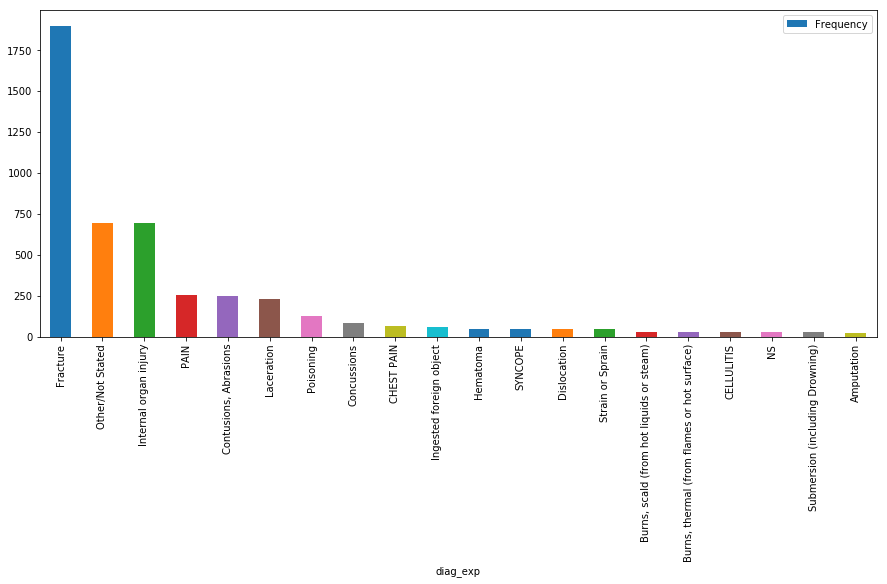

In [79]:
# Creating visualisation for required analysis
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)
plt.figure()
concat_hospitalized.iloc[0:20].plot(x='diag_exp', y='Frequency', kind='bar')

# Answer: Fracture (code 57) has highest number of hospitalization

## Disposition code 6 is for left without seen

In [80]:
# Repeating same steps for code 6
total_unseen = merged_df[(merged_df["disposition"]==6)].shape[0]
diag_unseen = merged_df[(merged_df["disposition"]==6)]["diag"].value_counts()\
                    .to_frame().reset_index().rename(columns={'index': 'diag', 'diag': 'Frequency'})\
                    .sort_values(by=['Frequency'], ascending=False)
diag_unseen = pd.merge(left=diag_unseen, right=diagnosis_df, how='left', on='diag')
diag_other_unseen = merged_df[(merged_df["disposition"]==6)]["diag_other"] \
                        .value_counts()\
                        .to_frame().reset_index().rename(columns={'index': 'diag_exp', 'diag_other': 'Frequency'})\
                        .sort_values(by=['Frequency'], ascending=False)
concat_unseen = pd.concat([diag_unseen.drop(['diag'], axis=1), diag_other_unseen], ignore_index = True)\
                        .sort_values(by=['Frequency'], ascending=False)

Populating the interactive namespace from numpy and matplotlib


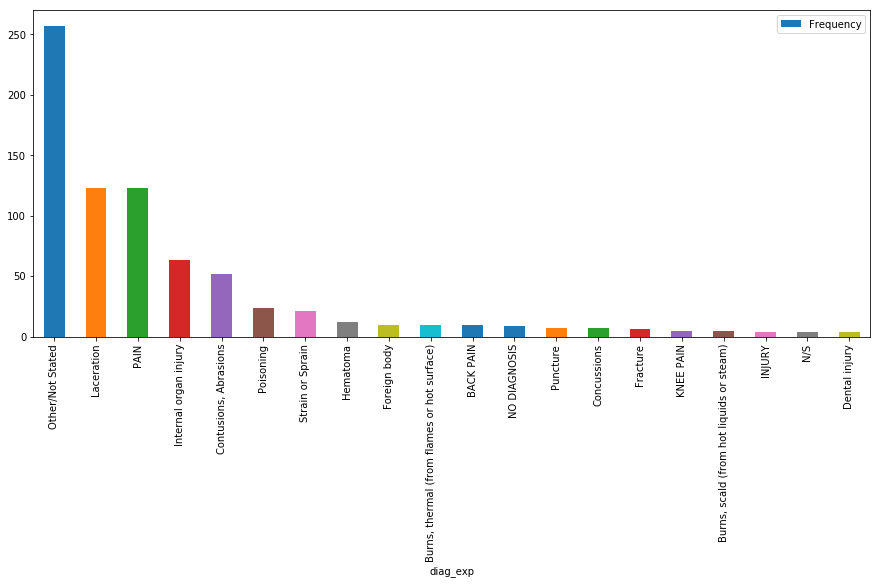

In [81]:
# Creating visualisation for required analysis
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)
plt.figure()
concat_unseen.iloc[0:20].plot(x='diag_exp', y='Frequency', kind='bar')

In [82]:
concat_unseen.head()

,Frequency,diag_exp
0,257,Other/Not Stated
1,123,Laceration
23,123,PAIN
2,63,Internal organ injury
3,52,"Contusions, Abrasions"


# Answer: Most of diagnosis of unseen is Other/Not Stated(code 71)

In [88]:
total_unrecorded = merged_df[(merged_df["disposition"]==9)].shape[0]
print("Total Disposition Not Recorded incidents:", total_unrecorded)

Total Disposition Not Recorded incidents: 0
